In [1]:
import os
import sys
import re
import time
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib.colors

# Scopus publication counts for Fig. 1

In [2]:
def read_scopus_data(file, drop_tail=1):
    df = pd.read_csv(file, index_col=0, header=3)
    df.columns = ['records']
    df.sort_values('YEAR', inplace=True)
    df.drop(df.tail(drop_tail).index, inplace=True)
    return df

In [3]:
dfs = []
files = ["data/Scopus-energy-and-social-science-Analyze-Year.csv",
         "data/Scopus-energy-not-social-science-Analyze-Year.csv",
         "data/Scopus-social-science-not-energy-Analyze-Year.csv"]
colnames = ['e and s', 'e not s', 's not e']

for i, file in enumerate(files):
    df = read_scopus_data(file)
    df.columns = [colnames[i]]
    dfs.append(df)
    
energy_socialscience = pd.concat(dfs, axis=1)
energy_socialscience

,e and s,e not s,s not e
YEAR,,,
1861,NaN,NaN,4213
1862,NaN,NaN,4715
1863,NaN,NaN,4406
1864,NaN,NaN,4611
1865,NaN,NaN,4586
...,...,...,...
2015,8064.0,94457.0,477573
2016,11794.0,105331.0,500715
2017,16609.0,122690.0,536913


<IPython.core.display.Javascript object>


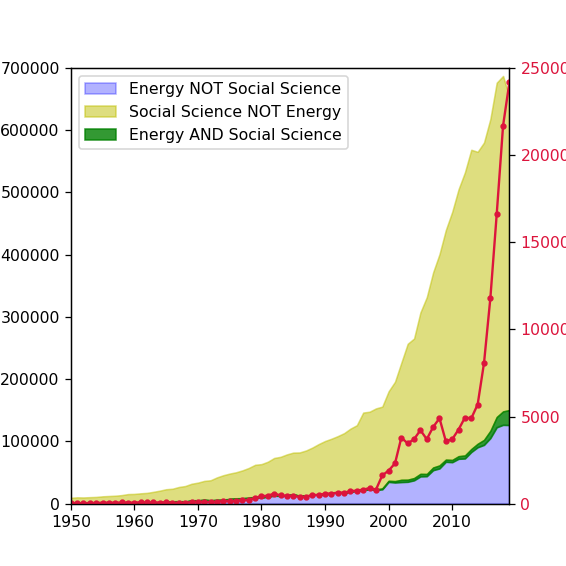

In [4]:
%matplotlib notebook
fig, ax1 = plt.subplots(figsize=(5, 5))

ax1.fill_between(energy_socialscience.index, energy_socialscience['e not s'], color='b',
                 alpha=0.3, label='Energy NOT Social Science')
ax1.fill_between(energy_socialscience.index, energy_socialscience['e not s'] + energy_socialscience['e and s'],
                 energy_socialscience['e not s'] + energy_socialscience['e and s'] + energy_socialscience['s not e'],
                 color='y', alpha=0.5, label="Social Science NOT Energy")
ax1.fill_between(energy_socialscience.index, energy_socialscience['e not s'],
                 energy_socialscience['e not s'] + energy_socialscience['e and s'], color='g',alpha=0.8, label="Energy AND Social Science")

ax2 = ax1.twinx()
color2 = 'crimson'
ax2.plot(energy_socialscience.index, energy_socialscience['e and s'], color=color2,alpha=1,
         marker='o', markersize=3, label="test")
ax2.set_ylabel('# records in Energy AND Social Science', color=color2)
ax2.set_ylim([0, 25000])
ax2.tick_params(axis='y', labelcolor=color2)

plt.xlim([1950, 2019])
ax1.set_ylim([0, 700000])
plt.xlabel("publication year")
ax1.set_ylabel("# records")
#plt.legend(['energy', '', 'social science'])
ax1.legend(loc='upper left')
#fig.savefig("count_energy-social-science-publications.png", bbox_inches='tight', dpi=150)
fig.savefig("count_energy-social-science-publications.svg", bbox_inches='tight')